In [1]:
import numpy as np
import os
import math
import pandas as pd
from collections import Counter
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.svm import SVC

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD, Adadelta, Adam
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from confusion_matrix import print_confusion_matrix

In [3]:
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

In [4]:
main_path_word_emb = "C:/Users/svruchtel/Documents/1/Texts classification/LSTM_results_word_emb/"
main_path_char_emb = "C:/Users/svruchtel/Documents/1/Texts classification/LSTM_results_char_emb/"

In [5]:
y_train_word_emb = np.load(main_path_word_emb + "France_ByMeaning_2nd_net_train_y.npy")
y_train_char_emb = np.load(main_path_char_emb + "France_ByMeaning_1st_net_train_y.npy")

y_test_word_emb = np.load(main_path_word_emb + "France_ByMeaning_2nd_net_test_y.npy")
y_test_char_emb = np.load(main_path_char_emb + "France_ByMeaning_1st_net_test_y.npy")

In [6]:
y_train = y_train_word_emb
y_test = y_test_word_emb

In [7]:
# print(y_test_word_emb.shape)
# print(y_test_char_emb.shape)

In [8]:
# for idx in range(len(y_train_2nd_net_word_emb)):
#     if y_train_2nd_net_word_emb[0].any() != y_train_3rd_net_word_emb[0].any():
#         print("problem")

In [9]:
# for idx in range(len(y_train_word_emb)):
#     if y_train_word_emb[0].any() != y_train_word_emb[0].any():
#         print("problem")

In [10]:
# let's load what we need
X_train_2nd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaning_2nd_net_train_X.npy")
X_train_3rd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaning_3rd_net_train_X.npy")
X_train_4th_net_word_emb = np.load(main_path_word_emb + "France_ByMeaning_4th_net_train_X.npy")

X_test_2nd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaning_2nd_net_test_X.npy")
X_test_3rd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaning_3rd_net_test_X.npy")
X_test_4th_net_word_emb = np.load(main_path_word_emb + "France_ByMeaning_4th_net_test_X.npy")

X_train_3rd_net_char_emb = np.load(main_path_char_emb + "France_ByMeaning_3rd_net_train_X_100_chars.npy")
X_train_4th_net_char_emb = np.load(main_path_char_emb + "France_ByMeaning_4th_net_train_X_100_chars.npy")

X_test_3rd_net_char_emb = np.load(main_path_char_emb + "France_ByMeaning_3rd_net_test_X_100_chars.npy")
X_test_4th_net_char_emb = np.load(main_path_char_emb + "France_ByMeaning_4th_net_test_X_100_chars.npy")

In [32]:
CATEGORIES_COUNT = 7

In [12]:
X_train_2_3 = np.concatenate((X_train_2nd_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_2_3 = np.concatenate((X_test_2nd_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_2_4 = np.concatenate((X_train_2nd_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_2_4 = np.concatenate((X_test_2nd_net_word_emb, X_test_4th_net_char_emb), axis=1)

X_train_3_3 = np.concatenate((X_train_3rd_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_3_3 = np.concatenate((X_test_3rd_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_3_4 = np.concatenate((X_train_3rd_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_3_4 = np.concatenate((X_test_3rd_net_word_emb, X_test_4th_net_char_emb), axis=1)

X_train_4_3 = np.concatenate((X_train_4th_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_4_3 = np.concatenate((X_test_4th_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_4_4 = np.concatenate((X_train_4th_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_4_4 = np.concatenate((X_test_4th_net_word_emb, X_test_4th_net_char_emb), axis=1)

## knn_uniform

#### 2_word, 3_char

test accuracy:  0.9432

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 295    1    0    1    3    0    9]
 [   3  144    0    3    0    0    3]
 [  10    1  207    0    0    2   16]
 [  18    6    4 1218    0    0    2]
 [   4    0    3    0  235    0    3]
 [   1    0    1    0    0  729    1]
 [  12    1    5    0    4    1  177]]
Normalized confusion matrix
[[0.95469256 0.00323625 0.         0.00323625 0.00970874 0.
  0.02912621]
 [0.01960784 0.94117647 0.         0.01960784 0.         0.
  0.01960784]
 [0.04237288 0.00423729 0.87711864 0.         0.         0.00847458
  0.06779661]
 [0.01442308 0.00480769 0.00320513 0.97596154 0.         0.
  0.00160256]
 [0.01632653 0.         0.0122449  0.         0.95918367 0.
  0.0122449 ]
 [0.00136612 0.         0.00136612 0.         0.         0.99590164
  0.00136612]
 [0.06       0.005      0.025      0.         0.02       0.005
  0.885     ]]


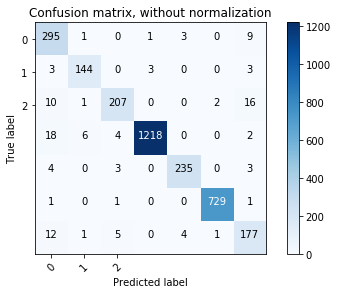

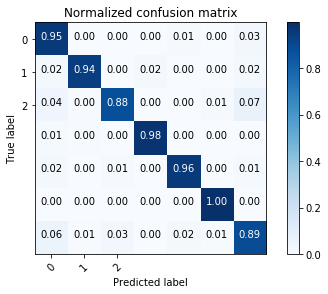


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   0   0   0   1]
 [  2  15   0   1   0   0   0]
 [  0   0  25   1   0   0   1]
 [  4   0   1 134   0   0   0]
 [  0   1   0   1  25   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   4   0   0   0  18]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.         0.         0.
  0.02857143]
 [0.11111111 0.83333333 0.         0.05555556 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.03703704 0.         0.
  0.03703704]
 [0.02877698 0.         0.00719424 0.96402878 0.         0.
  0.        ]
 [0.         0.03571429 0.         0.03571429 0.89285714 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.17391304 0.         0.         0.
  0.7826087 ]]


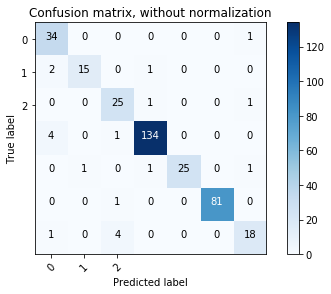

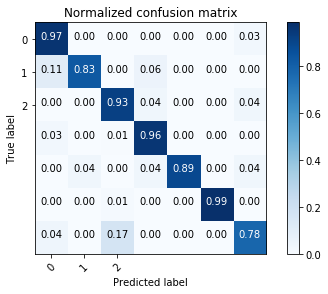

In [13]:
X_train = X_train_2_3
X_test = X_test_2_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)


#### 2 word, 4 char

test accuracy:  0.9403

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 301    1    0    1    1    0    5]
 [   4  144    0    3    0    0    2]
 [   8    1  210    0    0    2   15]
 [  19    6    4 1219    0    0    0]
 [   4    0    3    0  235    0    3]
 [   0    0    1    0    0  730    1]
 [  13    1    4    0    3    1  178]]
Normalized confusion matrix
[[0.97411003 0.00323625 0.         0.00323625 0.00323625 0.
  0.01618123]
 [0.02614379 0.94117647 0.         0.01960784 0.         0.
  0.0130719 ]
 [0.03389831 0.00423729 0.88983051 0.         0.         0.00847458
  0.06355932]
 [0.01522436 0.00480769 0.00320513 0.97676282 0.         0.
  0.        ]
 [0.01632653 0.         0.0122449  0.         0.95918367 0.
  0.0122449 ]
 [0.         0.         0.00136612 0.         0.         0.99726776
  0.00136612]
 [0.065      0.005      0.02       0.         0.015      0.005
  0.89      ]]


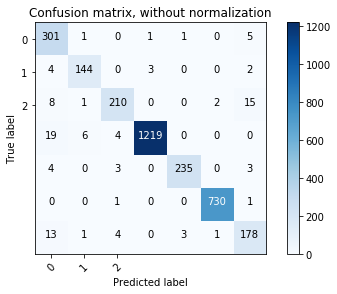

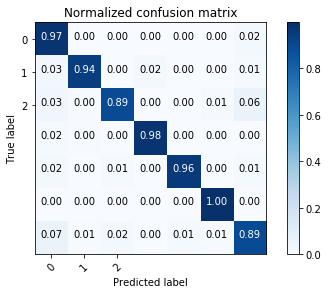


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 35   0   0   0   0   0   0]
 [  2  15   0   1   0   0   0]
 [  0   0  25   1   0   0   1]
 [  4   0   1 134   0   0   0]
 [  0   1   0   1  25   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   6   0   0   0  16]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.11111111 0.83333333 0.         0.05555556 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.03703704 0.         0.
  0.03703704]
 [0.02877698 0.         0.00719424 0.96402878 0.         0.
  0.        ]
 [0.         0.03571429 0.         0.03571429 0.89285714 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.26086957 0.         0.         0.
  0.69565217]]


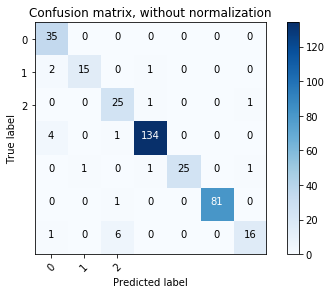

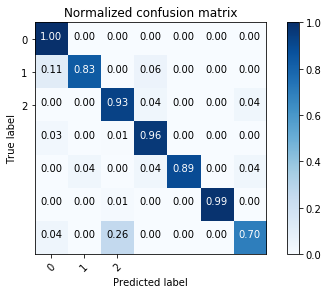

In [14]:
X_train = X_train_2_4
X_test = X_test_2_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.9602

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 303    0    1    5    0    0    0]
 [   1  144    0    8    0    0    0]
 [   1    0  233    0    0    0    2]
 [   2    1    1 1244    0    0    0]
 [   0    1    1    0  240    0    3]
 [   0    0    0    0    0  732    0]
 [   2    0    0    0    1    0  197]]
Normalized confusion matrix
[[9.80582524e-01 0.00000000e+00 3.23624595e-03 1.61812298e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.53594771e-03 9.41176471e-01 0.00000000e+00 5.22875817e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.23728814e-03 0.00000000e+00 9.87288136e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.47457627e-03]
 [1.60256410e-03 8.01282051e-04 8.01282051e-04 9.96794872e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.08163265e-03 4.08163265e-03 0.00000000e+00
  9.79591837e-01 0.00000000e+00 1.22448980e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

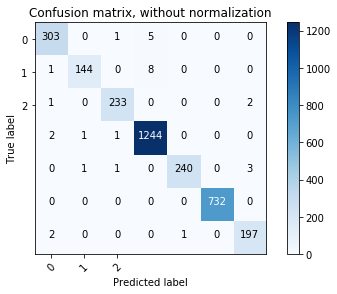

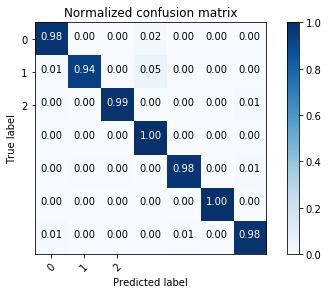


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   1   0   0   0]
 [  0  16   0   2   0   0   0]
 [  0   0  25   0   0   0   2]
 [  1   0   1 137   0   0   0]
 [  0   2   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.
  0.        ]
 [0.         0.88888889 0.         0.11111111 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.         0.         0.
  0.07407407]
 [0.00719424 0.         0.00719424 0.98561151 0.         0.
  0.        ]
 [0.         0.07142857 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


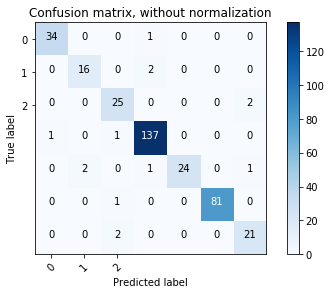

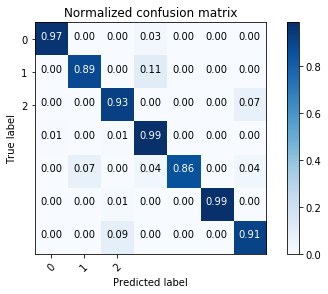

In [15]:
X_train = X_train_3_3
X_test = X_test_3_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.9602

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 303    0    1    5    0    0    0]
 [   0  144    0    9    0    0    0]
 [   1    0  233    0    0    0    2]
 [   1    1    1 1245    0    0    0]
 [   0    1    1    0  240    0    3]
 [   0    0    0    0    0  732    0]
 [   2    0    0    0    0    0  198]]
Normalized confusion matrix
[[9.80582524e-01 0.00000000e+00 3.23624595e-03 1.61812298e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.41176471e-01 0.00000000e+00 5.88235294e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.23728814e-03 0.00000000e+00 9.87288136e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.47457627e-03]
 [8.01282051e-04 8.01282051e-04 8.01282051e-04 9.97596154e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.08163265e-03 4.08163265e-03 0.00000000e+00
  9.79591837e-01 0.00000000e+00 1.22448980e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

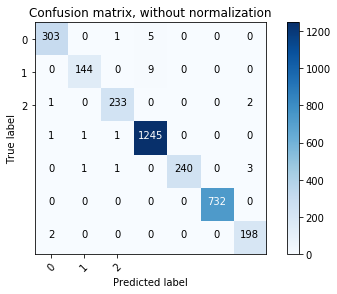

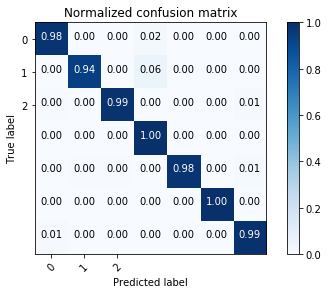


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   1   0   0   0]
 [  0  16   0   2   0   0   0]
 [  0   0  25   0   0   0   2]
 [  1   0   1 137   0   0   0]
 [  0   2   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.
  0.        ]
 [0.         0.88888889 0.         0.11111111 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.         0.         0.
  0.07407407]
 [0.00719424 0.         0.00719424 0.98561151 0.         0.
  0.        ]
 [0.         0.07142857 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


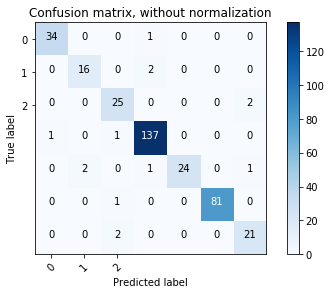

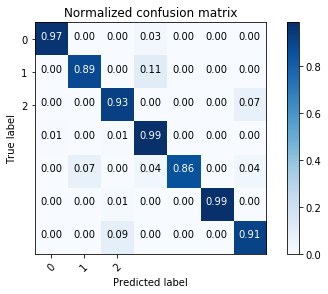

In [16]:
X_train = X_train_3_4
X_test = X_test_3_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.9375

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 297    0    8    3    0    0    1]
 [   2  139    0    6    0    0    6]
 [   5    0  210    0    4    0   17]
 [   5    1    4 1235    0    0    3]
 [   2    0    1    0  228    0   14]
 [   1    0    0    0    1  729    1]
 [   3    2    3    0    6    0  186]]
Normalized confusion matrix
[[9.61165049e-01 0.00000000e+00 2.58899676e-02 9.70873786e-03
  0.00000000e+00 0.00000000e+00 3.23624595e-03]
 [1.30718954e-02 9.08496732e-01 0.00000000e+00 3.92156863e-02
  0.00000000e+00 0.00000000e+00 3.92156863e-02]
 [2.11864407e-02 0.00000000e+00 8.89830508e-01 0.00000000e+00
  1.69491525e-02 0.00000000e+00 7.20338983e-02]
 [4.00641026e-03 8.01282051e-04 3.20512821e-03 9.89583333e-01
  0.00000000e+00 0.00000000e+00 2.40384615e-03]
 [8.16326531e-03 0.00000000e+00 4.08163265e-03 0.00000000e+00
  9.30612245e-01 0.00000000e+00 5.71428571e-02]
 [1.36612022e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.36

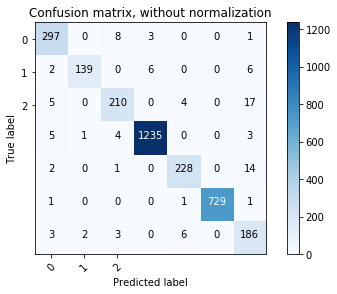

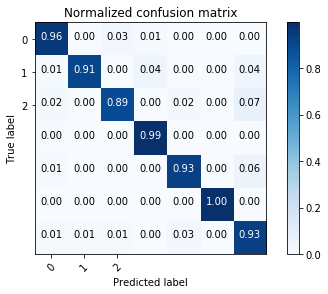


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 32   0   2   0   0   0   1]
 [  2  14   0   0   1   0   1]
 [  5   0  22   0   0   0   0]
 [  1   0   0 137   0   0   1]
 [  2   0   0   1  25   0   0]
 [  0   0   0   0   0  80   2]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.91428571 0.         0.05714286 0.         0.         0.
  0.02857143]
 [0.11111111 0.77777778 0.         0.         0.05555556 0.
  0.05555556]
 [0.18518519 0.         0.81481481 0.         0.         0.
  0.        ]
 [0.00719424 0.         0.         0.98561151 0.         0.
  0.00719424]
 [0.07142857 0.         0.         0.03571429 0.89285714 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.97560976
  0.02439024]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


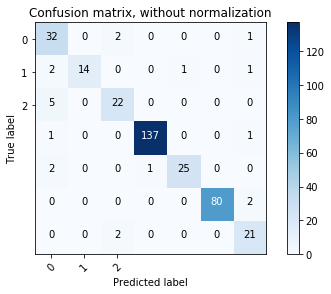

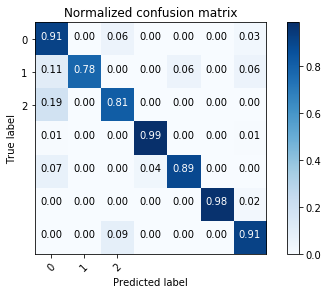

In [17]:
X_train = X_train_4_3
X_test = X_test_4_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.9432

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 298    0    7    3    0    0    1]
 [   3  140    0    6    0    0    4]
 [   9    0  208    0    5    0   14]
 [   3    1    4 1236    0    0    4]
 [   4    0    1    0  229    0   11]
 [   2    0    0    0    0  729    1]
 [   6    2    2    0    4    0  186]]
Normalized confusion matrix
[[9.64401294e-01 0.00000000e+00 2.26537217e-02 9.70873786e-03
  0.00000000e+00 0.00000000e+00 3.23624595e-03]
 [1.96078431e-02 9.15032680e-01 0.00000000e+00 3.92156863e-02
  0.00000000e+00 0.00000000e+00 2.61437908e-02]
 [3.81355932e-02 0.00000000e+00 8.81355932e-01 0.00000000e+00
  2.11864407e-02 0.00000000e+00 5.93220339e-02]
 [2.40384615e-03 8.01282051e-04 3.20512821e-03 9.90384615e-01
  0.00000000e+00 0.00000000e+00 3.20512821e-03]
 [1.63265306e-02 0.00000000e+00 4.08163265e-03 0.00000000e+00
  9.34693878e-01 0.00000000e+00 4.48979592e-02]
 [2.73224044e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

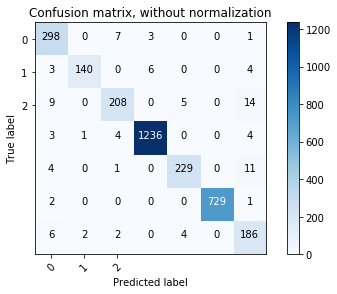

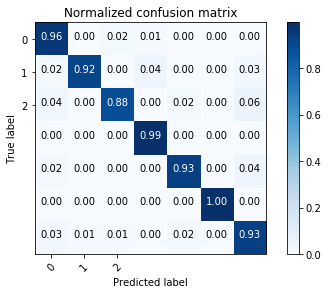


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 33   0   1   0   1   0   0]
 [  3  14   0   0   1   0   0]
 [  2   0  24   0   0   0   1]
 [  1   0   0 137   0   0   1]
 [  1   0   0   1  25   0   1]
 [  1   0   0   0   0  80   1]
 [  1   0   2   0   0   0  20]]
Normalized confusion matrix
[[0.94285714 0.         0.02857143 0.         0.02857143 0.
  0.        ]
 [0.16666667 0.77777778 0.         0.         0.05555556 0.
  0.        ]
 [0.07407407 0.         0.88888889 0.         0.         0.
  0.03703704]
 [0.00719424 0.         0.         0.98561151 0.         0.
  0.00719424]
 [0.03571429 0.         0.         0.03571429 0.89285714 0.
  0.03571429]
 [0.01219512 0.         0.         0.         0.         0.97560976
  0.01219512]
 [0.04347826 0.         0.08695652 0.         0.         0.
  0.86956522]]


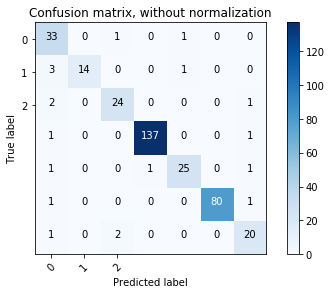

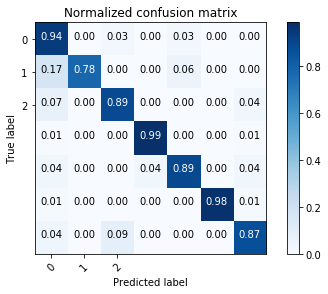

In [18]:
X_train = X_train_4_4
X_test = X_test_4_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

### knn_distance

#### 2 word, 3 char

test accuracy:  0.9403

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 309    0    0    0    0    0    0]
 [   0  153    0    0    0    0    0]
 [   0    0  236    0    0    0    0]
 [   0    0    0 1248    0    0    0]
 [   0    0    0    0  245    0    0]
 [   0    0    0    0    0  732    0]
 [   0    0    0    0    0    0  200]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


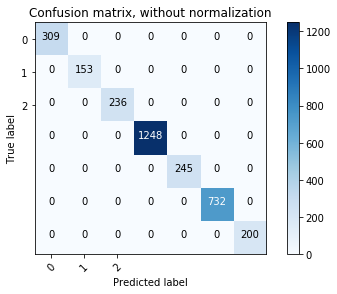

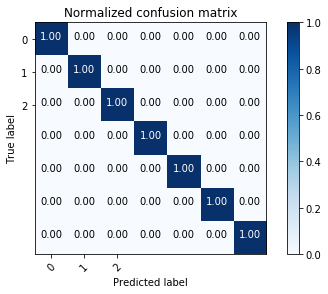


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   0   0   0   1]
 [  2  15   0   1   0   0   0]
 [  0   0  25   1   0   0   1]
 [  4   0   1 134   0   0   0]
 [  0   1   0   1  25   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   5   0   0   0  17]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.         0.         0.
  0.02857143]
 [0.11111111 0.83333333 0.         0.05555556 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.03703704 0.         0.
  0.03703704]
 [0.02877698 0.         0.00719424 0.96402878 0.         0.
  0.        ]
 [0.         0.03571429 0.         0.03571429 0.89285714 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.2173913  0.         0.         0.
  0.73913043]]


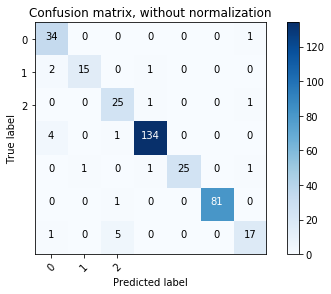

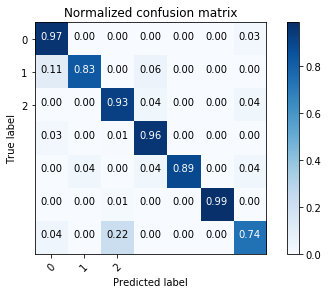

In [19]:
X_train = X_train_2_3
X_test = X_test_2_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 2 word, 4 char

test accuracy:  0.9375

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 309    0    0    0    0    0    0]
 [   0  153    0    0    0    0    0]
 [   0    0  236    0    0    0    0]
 [   0    0    0 1248    0    0    0]
 [   0    0    0    0  245    0    0]
 [   0    0    0    0    0  732    0]
 [   0    0    0    0    0    0  200]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


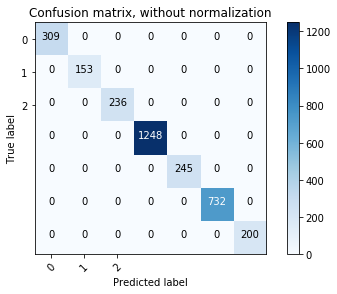

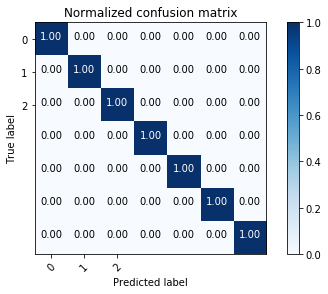


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 35   0   0   0   0   0   0]
 [  2  15   0   1   0   0   0]
 [  0   0  25   1   0   0   1]
 [  4   0   1 134   0   0   0]
 [  0   1   0   1  25   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   6   0   0   0  16]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.11111111 0.83333333 0.         0.05555556 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.03703704 0.         0.
  0.03703704]
 [0.02877698 0.         0.00719424 0.96402878 0.         0.
  0.        ]
 [0.         0.03571429 0.         0.03571429 0.89285714 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.26086957 0.         0.         0.
  0.69565217]]


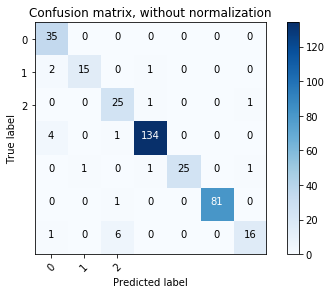

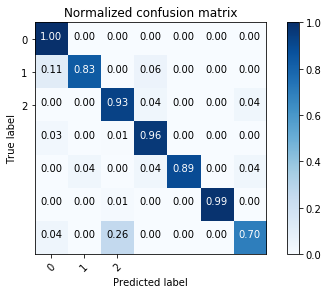

In [20]:
X_train = X_train_2_4
X_test = X_test_2_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.9602

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 309    0    0    0    0    0    0]
 [   0  153    0    0    0    0    0]
 [   0    0  236    0    0    0    0]
 [   0    0    0 1248    0    0    0]
 [   0    0    0    0  245    0    0]
 [   0    0    0    0    0  732    0]
 [   0    0    0    0    0    0  200]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


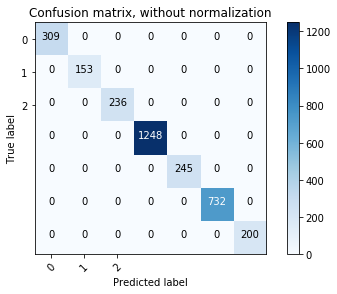

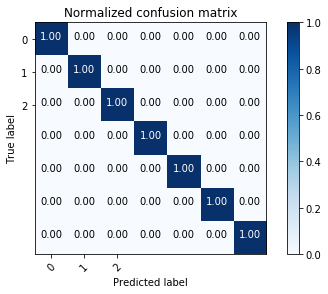


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   1   0   0   0]
 [  0  16   0   2   0   0   0]
 [  0   0  25   0   0   0   2]
 [  1   0   1 137   0   0   0]
 [  0   2   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   1   0   0   0  21]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.
  0.        ]
 [0.         0.88888889 0.         0.11111111 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.         0.         0.
  0.07407407]
 [0.00719424 0.         0.00719424 0.98561151 0.         0.
  0.        ]
 [0.         0.07142857 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.04347826 0.         0.         0.
  0.91304348]]


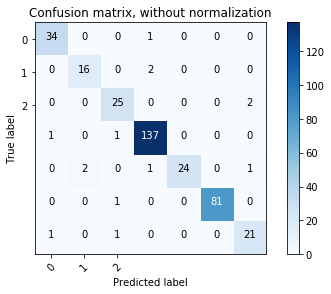

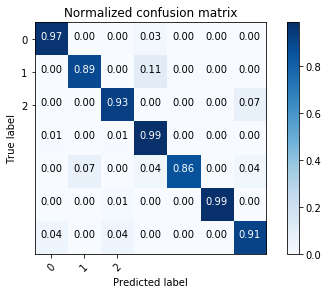

In [21]:
X_train = X_train_3_3
X_test = X_test_3_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.9602

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 309    0    0    0    0    0    0]
 [   0  153    0    0    0    0    0]
 [   0    0  236    0    0    0    0]
 [   0    0    0 1248    0    0    0]
 [   0    0    0    0  245    0    0]
 [   0    0    0    0    0  732    0]
 [   0    0    0    0    0    0  200]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


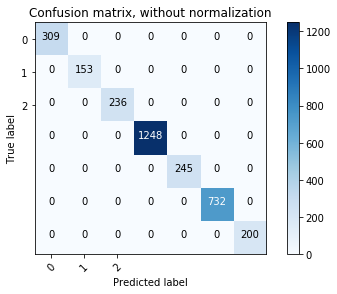

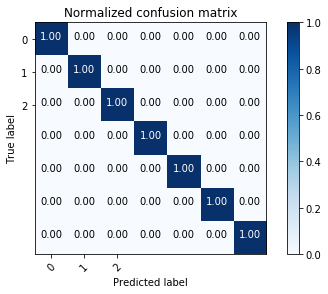


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   1   0   0   0]
 [  0  16   0   2   0   0   0]
 [  0   0  25   0   0   0   2]
 [  1   0   1 137   0   0   0]
 [  0   2   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.
  0.        ]
 [0.         0.88888889 0.         0.11111111 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.         0.         0.
  0.07407407]
 [0.00719424 0.         0.00719424 0.98561151 0.         0.
  0.        ]
 [0.         0.07142857 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


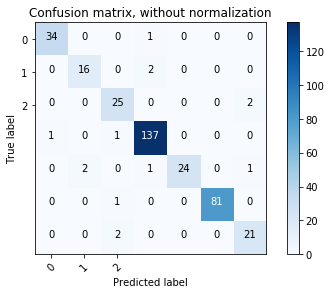

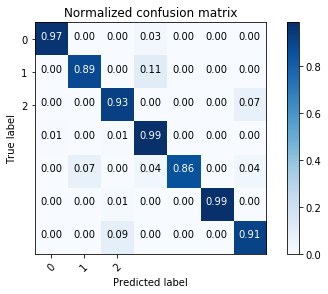

In [22]:
X_train = X_train_3_4
X_test = X_test_3_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.9375

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 309    0    0    0    0    0    0]
 [   0  153    0    0    0    0    0]
 [   0    0  236    0    0    0    0]
 [   0    0    0 1248    0    0    0]
 [   0    0    0    0  245    0    0]
 [   0    0    0    0    0  732    0]
 [   0    0    0    0    0    0  200]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


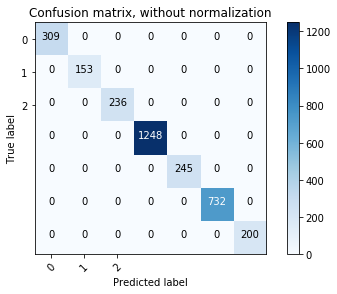

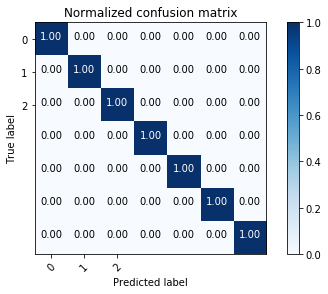


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 32   0   2   0   0   0   1]
 [  2  14   0   0   1   0   1]
 [  5   0  22   0   0   0   0]
 [  1   0   0 137   0   0   1]
 [  2   0   0   1  25   0   0]
 [  0   0   0   0   0  80   2]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.91428571 0.         0.05714286 0.         0.         0.
  0.02857143]
 [0.11111111 0.77777778 0.         0.         0.05555556 0.
  0.05555556]
 [0.18518519 0.         0.81481481 0.         0.         0.
  0.        ]
 [0.00719424 0.         0.         0.98561151 0.         0.
  0.00719424]
 [0.07142857 0.         0.         0.03571429 0.89285714 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.97560976
  0.02439024]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


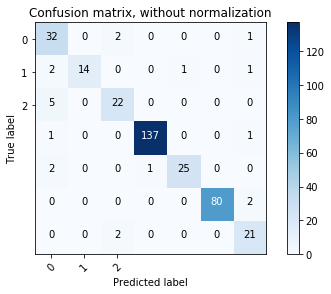

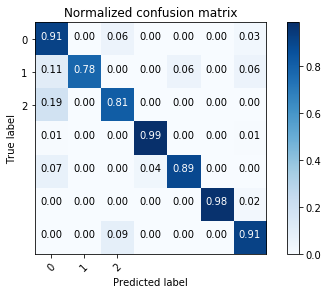

In [23]:
X_train = X_train_4_3
X_test = X_test_4_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.9403

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 309    0    0    0    0    0    0]
 [   0  153    0    0    0    0    0]
 [   0    0  236    0    0    0    0]
 [   0    0    0 1248    0    0    0]
 [   0    0    0    0  245    0    0]
 [   0    0    0    0    0  732    0]
 [   0    0    0    0    0    0  200]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


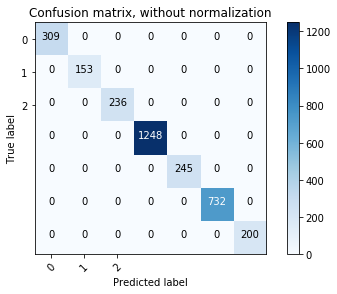

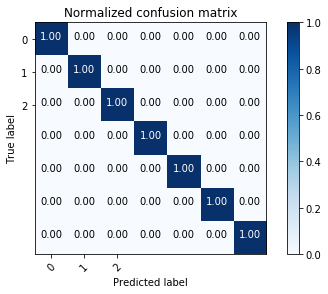


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 33   0   1   0   1   0   0]
 [  3  14   0   0   1   0   0]
 [  1   0  24   0   0   0   2]
 [  1   0   0 137   0   0   1]
 [  1   0   0   1  25   0   1]
 [  1   0   0   0   0  80   1]
 [  2   0   2   0   0   0  19]]
Normalized confusion matrix
[[0.94285714 0.         0.02857143 0.         0.02857143 0.
  0.        ]
 [0.16666667 0.77777778 0.         0.         0.05555556 0.
  0.        ]
 [0.03703704 0.         0.88888889 0.         0.         0.
  0.07407407]
 [0.00719424 0.         0.         0.98561151 0.         0.
  0.00719424]
 [0.03571429 0.         0.         0.03571429 0.89285714 0.
  0.03571429]
 [0.01219512 0.         0.         0.         0.         0.97560976
  0.01219512]
 [0.08695652 0.         0.08695652 0.         0.         0.
  0.82608696]]


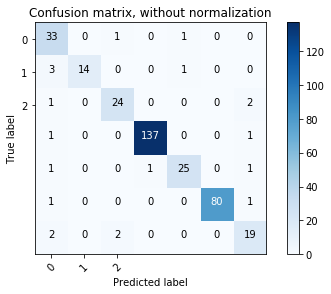

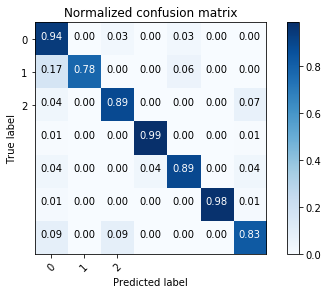

In [24]:
X_train = X_train_4_4
X_test = X_test_4_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

### SVM

#### 2 word, 3 char

test accuracy:  0.9432

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 284    1    0    1    3    0   20]
 [   1  144    0    3    0    0    5]
 [   4    1  204    0    0    8   19]
 [  17    6    4 1217    0    0    4]
 [   1    0    5    0  235    0    4]
 [   0    0    1    0    0  730    1]
 [   8    1    5    0    4    1  181]]
Normalized confusion matrix
[[0.91909385 0.00323625 0.         0.00323625 0.00970874 0.
  0.06472492]
 [0.00653595 0.94117647 0.         0.01960784 0.         0.
  0.03267974]
 [0.01694915 0.00423729 0.86440678 0.         0.         0.03389831
  0.08050847]
 [0.01362179 0.00480769 0.00320513 0.97516026 0.         0.
  0.00320513]
 [0.00408163 0.         0.02040816 0.         0.95918367 0.
  0.01632653]
 [0.         0.         0.00136612 0.         0.         0.99726776
  0.00136612]
 [0.04       0.005      0.025      0.         0.02       0.005
  0.905     ]]


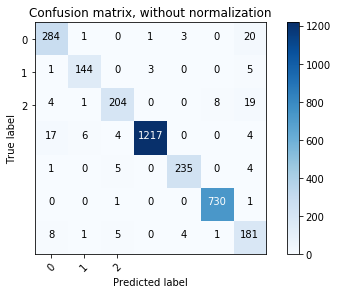

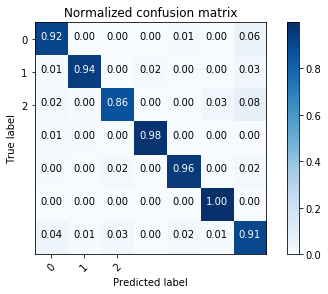


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   0   0   0   1]
 [  0  15   0   1   0   0   2]
 [  0   0  25   1   0   0   1]
 [  4   0   1 134   0   0   0]
 [  0   1   0   1  25   0   1]
 [  0   0   1   0   0  81   0]
 [  0   0   5   0   0   0  18]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.         0.         0.
  0.02857143]
 [0.         0.83333333 0.         0.05555556 0.         0.
  0.11111111]
 [0.         0.         0.92592593 0.03703704 0.         0.
  0.03703704]
 [0.02877698 0.         0.00719424 0.96402878 0.         0.
  0.        ]
 [0.         0.03571429 0.         0.03571429 0.89285714 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.         0.         0.2173913  0.         0.         0.
  0.7826087 ]]


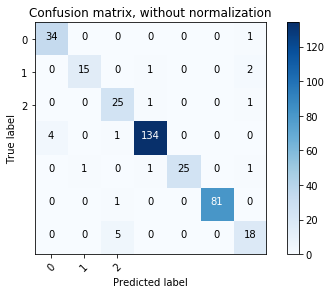

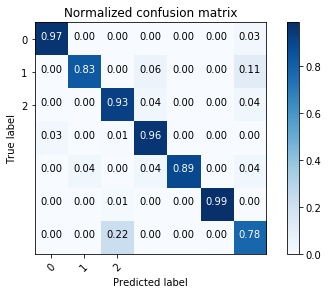

In [25]:
X_train = X_train_2_3
X_test = X_test_2_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 2 word, 4 char

test accuracy:  0.9460

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 289    1    0    1    2    0   16]
 [   1  144    0    3    0    0    5]
 [   4    1  206    0    0    6   19]
 [  16    6    3 1218    0    0    5]
 [   1    0    5    0  236    0    3]
 [   0    0    1    0    0  730    1]
 [   7    1    5    0    4    1  182]]
Normalized confusion matrix
[[0.93527508 0.00323625 0.         0.00323625 0.00647249 0.
  0.05177994]
 [0.00653595 0.94117647 0.         0.01960784 0.         0.
  0.03267974]
 [0.01694915 0.00423729 0.87288136 0.         0.         0.02542373
  0.08050847]
 [0.01282051 0.00480769 0.00240385 0.97596154 0.         0.
  0.00400641]
 [0.00408163 0.         0.02040816 0.         0.96326531 0.
  0.0122449 ]
 [0.         0.         0.00136612 0.         0.         0.99726776
  0.00136612]
 [0.035      0.005      0.025      0.         0.02       0.005
  0.91      ]]


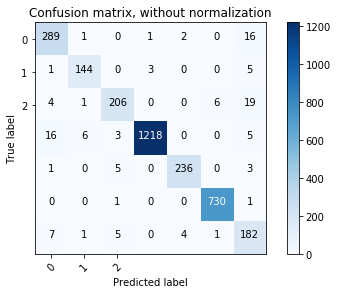

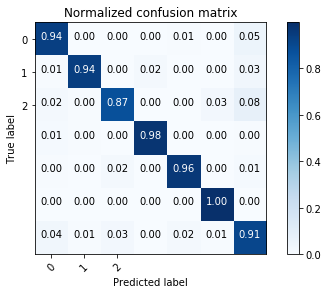


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 35   0   0   0   0   0   0]
 [  1  15   0   1   0   0   1]
 [  0   0  25   1   0   0   1]
 [  4   0   1 134   0   0   0]
 [  0   1   0   1  25   0   1]
 [  0   0   1   0   0  81   0]
 [  0   0   5   0   0   0  18]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.05555556 0.83333333 0.         0.05555556 0.         0.
  0.05555556]
 [0.         0.         0.92592593 0.03703704 0.         0.
  0.03703704]
 [0.02877698 0.         0.00719424 0.96402878 0.         0.
  0.        ]
 [0.         0.03571429 0.         0.03571429 0.89285714 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.         0.         0.2173913  0.         0.         0.
  0.7826087 ]]


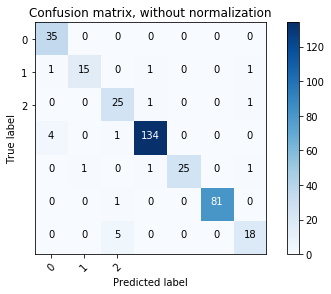

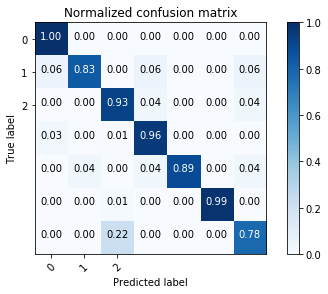

In [26]:
X_train = X_train_2_4
X_test = X_test_2_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.9631

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 303    0    1    5    0    0    0]
 [   0  143    0   10    0    0    0]
 [   0    1  233    0    0    0    2]
 [   1    1    1 1245    0    0    0]
 [   0    1    1    0  240    0    3]
 [   0    0    0    0    0  732    0]
 [   0    0    0    0    1    0  199]]
Normalized confusion matrix
[[9.80582524e-01 0.00000000e+00 3.23624595e-03 1.61812298e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.34640523e-01 0.00000000e+00 6.53594771e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.23728814e-03 9.87288136e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.47457627e-03]
 [8.01282051e-04 8.01282051e-04 8.01282051e-04 9.97596154e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.08163265e-03 4.08163265e-03 0.00000000e+00
  9.79591837e-01 0.00000000e+00 1.22448980e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

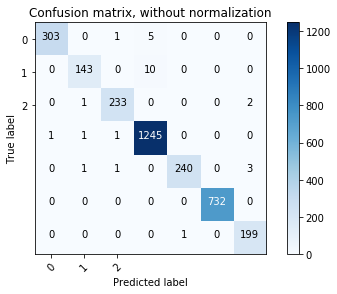

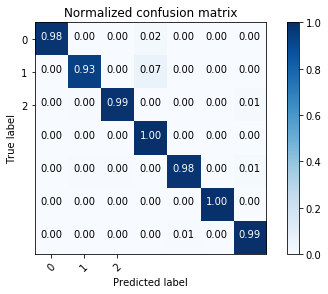


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   1   0   0   0]
 [  0  16   0   2   0   0   0]
 [  0   0  25   0   0   0   2]
 [  0   0   1 138   0   0   0]
 [  0   2   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.
  0.        ]
 [0.         0.88888889 0.         0.11111111 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.         0.         0.
  0.07407407]
 [0.         0.         0.00719424 0.99280576 0.         0.
  0.        ]
 [0.         0.07142857 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


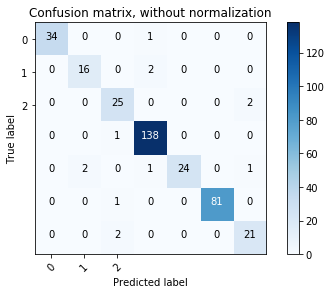

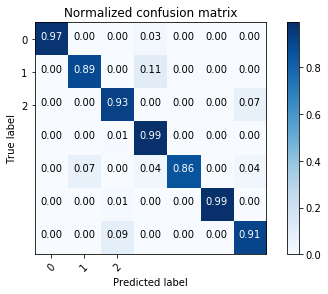

In [27]:
X_train = X_train_3_3
X_test = X_test_3_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.9631

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 303    0    1    5    0    0    0]
 [   0  142    0   11    0    0    0]
 [   0    0  233    0    0    0    3]
 [   1    1    1 1245    0    0    0]
 [   0    1    1    0  240    0    3]
 [   0    0    0    0    0  732    0]
 [   0    0    0    0    0    0  200]]
Normalized confusion matrix
[[9.80582524e-01 0.00000000e+00 3.23624595e-03 1.61812298e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.28104575e-01 0.00000000e+00 7.18954248e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.87288136e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.27118644e-02]
 [8.01282051e-04 8.01282051e-04 8.01282051e-04 9.97596154e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.08163265e-03 4.08163265e-03 0.00000000e+00
  9.79591837e-01 0.00000000e+00 1.22448980e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

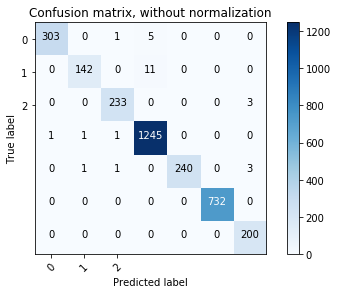

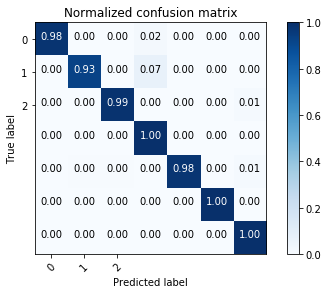


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   1   0   0   0]
 [  0  16   0   2   0   0   0]
 [  0   0  25   0   0   0   2]
 [  0   0   1 138   0   0   0]
 [  0   2   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.
  0.        ]
 [0.         0.88888889 0.         0.11111111 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.         0.         0.
  0.07407407]
 [0.         0.         0.00719424 0.99280576 0.         0.
  0.        ]
 [0.         0.07142857 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


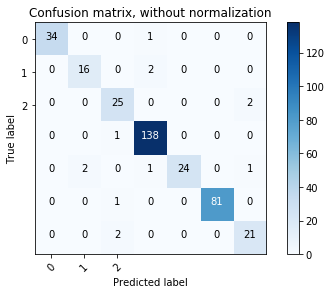

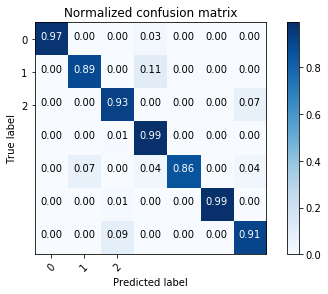

In [28]:
X_train = X_train_3_4
X_test = X_test_3_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.9432

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 294    0   10    3    0    0    2]
 [   0  139    0    6    0    0    8]
 [   0    0  208    0    6    0   22]
 [   3    1    4 1236    0    0    4]
 [   0    0    2    0  228    0   15]
 [   0    0    0    0    2  729    1]
 [   0    2    0    0    6    0  192]]
Normalized confusion matrix
[[9.51456311e-01 0.00000000e+00 3.23624595e-02 9.70873786e-03
  0.00000000e+00 0.00000000e+00 6.47249191e-03]
 [0.00000000e+00 9.08496732e-01 0.00000000e+00 3.92156863e-02
  0.00000000e+00 0.00000000e+00 5.22875817e-02]
 [0.00000000e+00 0.00000000e+00 8.81355932e-01 0.00000000e+00
  2.54237288e-02 0.00000000e+00 9.32203390e-02]
 [2.40384615e-03 8.01282051e-04 3.20512821e-03 9.90384615e-01
  0.00000000e+00 0.00000000e+00 3.20512821e-03]
 [0.00000000e+00 0.00000000e+00 8.16326531e-03 0.00000000e+00
  9.30612245e-01 0.00000000e+00 6.12244898e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.73

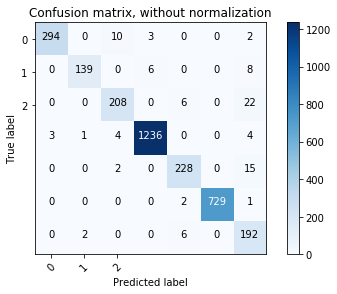

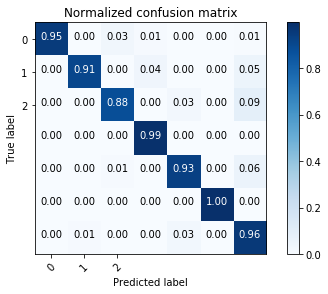


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 32   0   2   0   0   0   1]
 [  1  14   0   0   1   0   2]
 [  1   0  22   0   1   0   3]
 [  0   0   0 137   0   0   2]
 [  0   0   0   1  26   0   1]
 [  0   0   0   0   0  80   2]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.91428571 0.         0.05714286 0.         0.         0.
  0.02857143]
 [0.05555556 0.77777778 0.         0.         0.05555556 0.
  0.11111111]
 [0.03703704 0.         0.81481481 0.         0.03703704 0.
  0.11111111]
 [0.         0.         0.         0.98561151 0.         0.
  0.01438849]
 [0.         0.         0.         0.03571429 0.92857143 0.
  0.03571429]
 [0.         0.         0.         0.         0.         0.97560976
  0.02439024]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


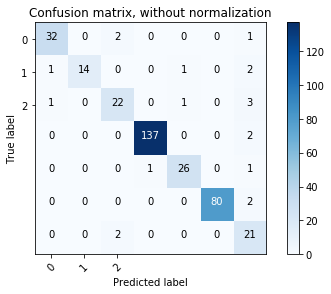

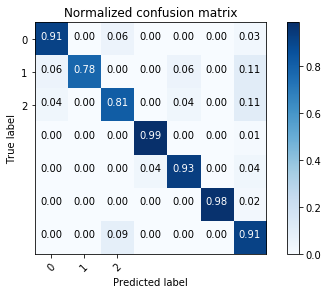

In [29]:
X_train = X_train_4_3
X_test = X_test_4_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.9460

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 295    0    9    3    0    0    2]
 [   0  138    0    7    0    0    8]
 [   0    0  208    0    6    0   22]
 [   3    1    4 1236    0    0    4]
 [   0    0    2    0  229    0   14]
 [   0    0    0    0    2  729    1]
 [   0    2    0    0    6    0  192]]
Normalized confusion matrix
[[9.54692557e-01 0.00000000e+00 2.91262136e-02 9.70873786e-03
  0.00000000e+00 0.00000000e+00 6.47249191e-03]
 [0.00000000e+00 9.01960784e-01 0.00000000e+00 4.57516340e-02
  0.00000000e+00 0.00000000e+00 5.22875817e-02]
 [0.00000000e+00 0.00000000e+00 8.81355932e-01 0.00000000e+00
  2.54237288e-02 0.00000000e+00 9.32203390e-02]
 [2.40384615e-03 8.01282051e-04 3.20512821e-03 9.90384615e-01
  0.00000000e+00 0.00000000e+00 3.20512821e-03]
 [0.00000000e+00 0.00000000e+00 8.16326531e-03 0.00000000e+00
  9.34693878e-01 0.00000000e+00 5.71428571e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.73

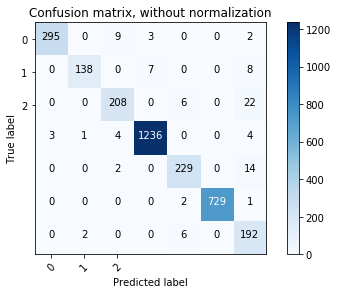

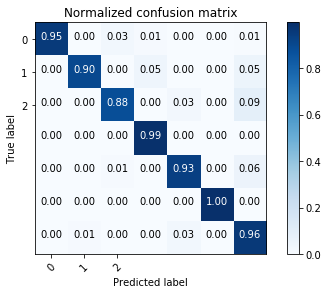


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 32   0   2   0   0   0   1]
 [  1  14   0   0   1   0   2]
 [  1   0  23   0   1   0   2]
 [  0   0   0 137   0   0   2]
 [  0   0   0   1  26   0   1]
 [  0   0   0   0   0  80   2]
 [  0   0   2   0   0   0  21]]
Normalized confusion matrix
[[0.91428571 0.         0.05714286 0.         0.         0.
  0.02857143]
 [0.05555556 0.77777778 0.         0.         0.05555556 0.
  0.11111111]
 [0.03703704 0.         0.85185185 0.         0.03703704 0.
  0.07407407]
 [0.         0.         0.         0.98561151 0.         0.
  0.01438849]
 [0.         0.         0.         0.03571429 0.92857143 0.
  0.03571429]
 [0.         0.         0.         0.         0.         0.97560976
  0.02439024]
 [0.         0.         0.08695652 0.         0.         0.
  0.91304348]]


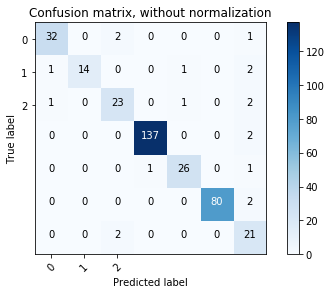

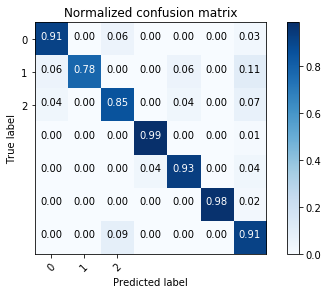

In [30]:
X_train = X_train_4_4
X_test = X_test_4_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

### meta_net

#### 2 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               7680      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 1799      
Total params: 140,807
Trainable params: 140,807
Non-trainable params: 0
_________________________________________________________________
None
Train on 3123 samples, validate on 352 samples
Epoch 1/300
3123/3123 [==============================] - 2s 689us/step - loss: 0.544

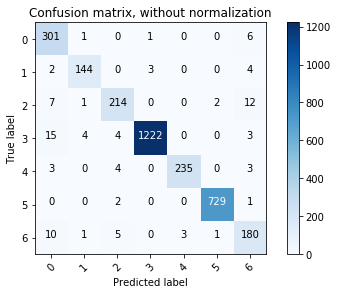

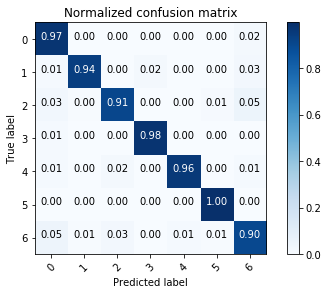


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   0   0   0   1]
 [  2  15   0   1   0   0   0]
 [  0   0  25   1   0   0   1]
 [  4   0   1 134   0   0   0]
 [  1   1   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   4   0   0   0  18]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.         0.         0.
  0.02857143]
 [0.11111111 0.83333333 0.         0.05555556 0.         0.
  0.        ]
 [0.         0.         0.92592593 0.03703704 0.         0.
  0.03703704]
 [0.02877698 0.         0.00719424 0.96402878 0.         0.
  0.        ]
 [0.03571429 0.03571429 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.17391304 0.         0.         0.
  0.7826087 ]]


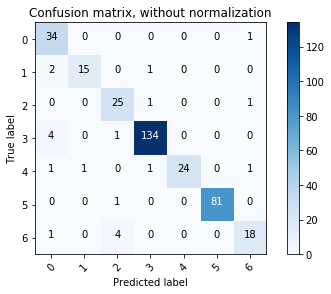

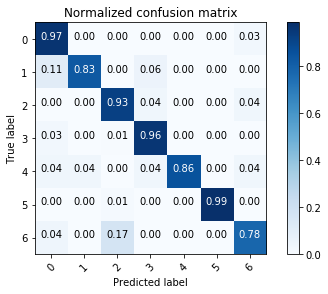

Wall time: 11 s


In [33]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_2_3
X_test = X_test_2_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaning/meta_net_train_2_3.npy"
file_path_test = "./Stacking_Results_France_ByMeaning/meta_net_test_2_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 2 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               7680      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 1799      
Total params: 140,807
Trainable params: 140,807
Non-trainable params: 0
_________________________________________________________________
None
Train on 3123 samples, validate on 352 samples
Epoch 1/300
3123/3123 [==============================] - 2s 485us/step - loss: 0.523

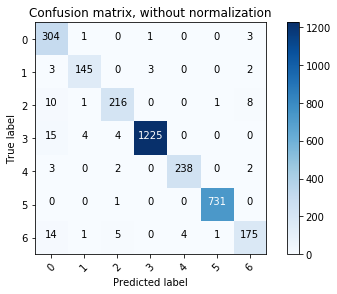

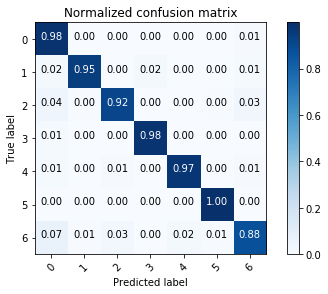


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 33   0   0   1   1   0   0]
 [  2  15   0   1   0   0   0]
 [  0   0  24   1   0   0   2]
 [  1   0   1 137   0   0   0]
 [  1   1   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   7   0   1   0  14]]
Normalized confusion matrix
[[0.94285714 0.         0.         0.02857143 0.02857143 0.
  0.        ]
 [0.11111111 0.83333333 0.         0.05555556 0.         0.
  0.        ]
 [0.         0.         0.88888889 0.03703704 0.         0.
  0.07407407]
 [0.00719424 0.         0.00719424 0.98561151 0.         0.
  0.        ]
 [0.03571429 0.03571429 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.30434783 0.         0.04347826 0.
  0.60869565]]


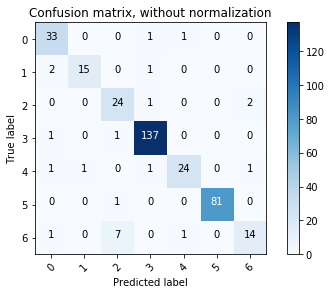

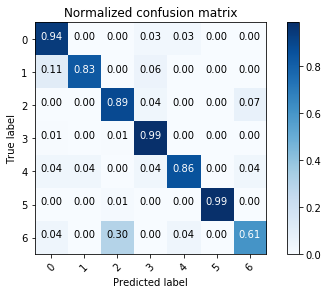

Wall time: 11 s


In [35]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_2_4
X_test = X_test_2_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaning/meta_net_train_2_4.npy"
file_path_test = "./Stacking_Results_France_ByMeaning/meta_net_test_2_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 3 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               7680      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 1799      
Total params: 140,807
Trainable params: 140,807
Non-trainable params: 0
_________________________________________________________________
None
Train on 3123 samples, validate on 352 samples
Epoch 1/300
3123/3123 [==============================] - 2s 510us/step - loss: 0.491

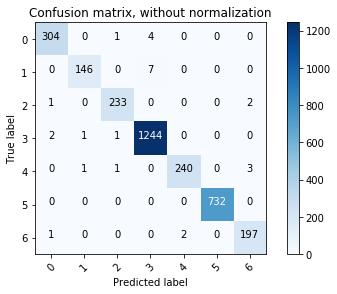

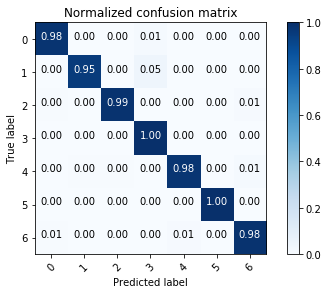


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   1   0   0   0]
 [  1  16   0   1   0   0   0]
 [  1   0  25   0   0   0   1]
 [  1   0   1 137   0   0   0]
 [  0   2   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   2   0   0   0  20]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.
  0.        ]
 [0.05555556 0.88888889 0.         0.05555556 0.         0.
  0.        ]
 [0.03703704 0.         0.92592593 0.         0.         0.
  0.03703704]
 [0.00719424 0.         0.00719424 0.98561151 0.         0.
  0.        ]
 [0.         0.07142857 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.08695652 0.         0.         0.
  0.86956522]]


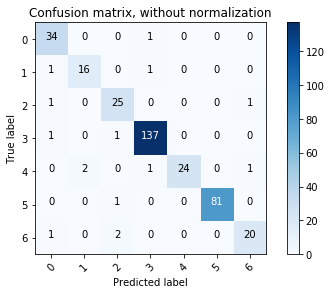

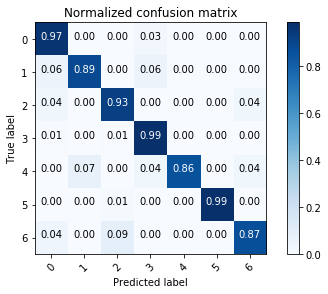

Wall time: 11.3 s


In [36]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_3_3
X_test = X_test_3_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaning/meta_net_train_3_3.npy"
file_path_test = "./Stacking_Results_France_ByMeaning/meta_net_test_3_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 3 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               7680      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 1799      
Total params: 140,807
Trainable params: 140,807
Non-trainable params: 0
_________________________________________________________________
None
Train on 3123 samples, validate on 352 samples
Epoch 1/300
3123/3123 [==============================] - 2s 557us/step - loss: 0.450

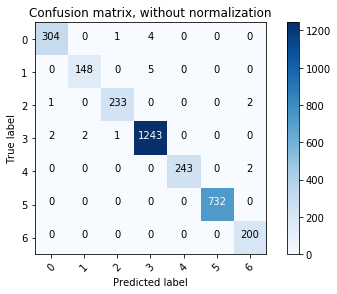

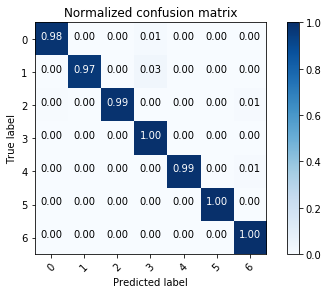


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 34   0   0   1   0   0   0]
 [  1  17   0   0   0   0   0]
 [  0   0  25   0   0   0   2]
 [  1   1   1 136   0   0   0]
 [  0   2   0   1  24   0   1]
 [  0   0   1   0   0  81   0]
 [  1   0   1   0   0   0  21]]
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.
  0.        ]
 [0.05555556 0.94444444 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.92592593 0.         0.         0.
  0.07407407]
 [0.00719424 0.00719424 0.00719424 0.97841727 0.         0.
  0.        ]
 [0.         0.07142857 0.         0.03571429 0.85714286 0.
  0.03571429]
 [0.         0.         0.01219512 0.         0.         0.98780488
  0.        ]
 [0.04347826 0.         0.04347826 0.         0.         0.
  0.91304348]]


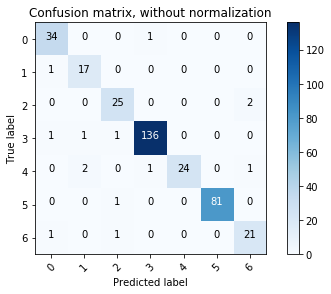

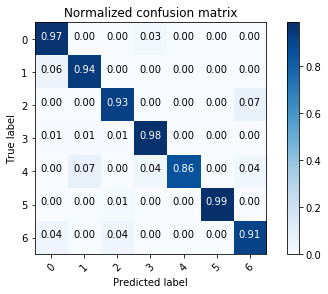

Wall time: 13.2 s


In [37]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_3_4
X_test = X_test_3_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaning/meta_net_train_3_4.npy"
file_path_test = "./Stacking_Results_France_ByMeaning/meta_net_test_3_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 4 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               7680      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 1799      
Total params: 140,807
Trainable params: 140,807
Non-trainable params: 0
_________________________________________________________________
None
Train on 3123 samples, validate on 352 samples
Epoch 1/300
3123/3123 [==============================] - 2s 617us/step - loss: 0.510

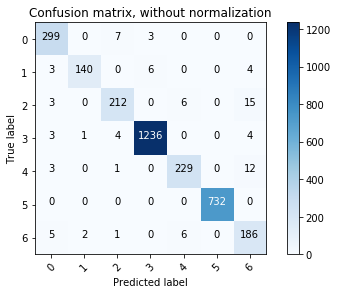

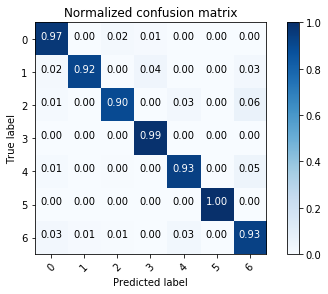


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 33   0   2   0   0   0   0]
 [  1  16   0   0   1   0   0]
 [  1   0  24   0   1   0   1]
 [  0   0   0 137   0   0   2]
 [  0   0   0   1  26   0   1]
 [  1   0   0   0   0  80   1]
 [  0   0   3   0   0   0  20]]
Normalized confusion matrix
[[0.94285714 0.         0.05714286 0.         0.         0.
  0.        ]
 [0.05555556 0.88888889 0.         0.         0.05555556 0.
  0.        ]
 [0.03703704 0.         0.88888889 0.         0.03703704 0.
  0.03703704]
 [0.         0.         0.         0.98561151 0.         0.
  0.01438849]
 [0.         0.         0.         0.03571429 0.92857143 0.
  0.03571429]
 [0.01219512 0.         0.         0.         0.         0.97560976
  0.01219512]
 [0.         0.         0.13043478 0.         0.         0.
  0.86956522]]


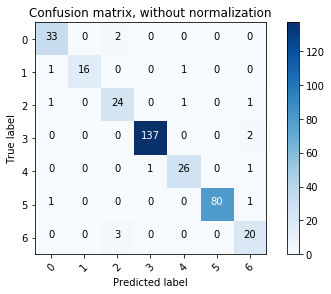

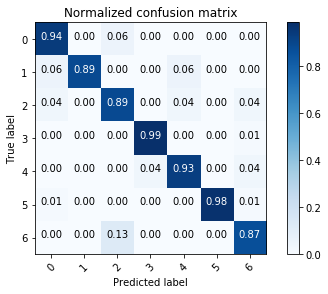

Wall time: 11.8 s


In [38]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_4_3
X_test = X_test_4_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaning/meta_net_train_4_3.npy"
file_path_test = "./Stacking_Results_France_ByMeaning/meta_net_test_4_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 4 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               7680      
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 7)                 1799      
Total params: 140,807
Trainable params: 140,807
Non-trainable params: 0
_________________________________________________________________
None
Train on 3123 samples, validate on 352 samples
Epoch 1/300
3123/3123 [==============================] - 2s 615us/step - loss: 0.523

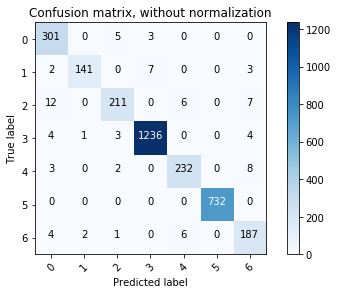

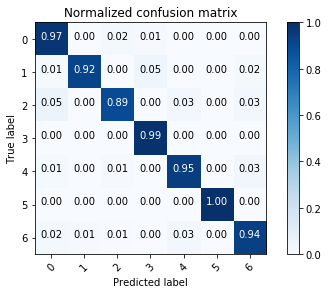


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 32   0   1   0   1   1   0]
 [  3  14   0   0   1   0   0]
 [  3   0  23   0   0   0   1]
 [  1   0   0 137   0   0   1]
 [  3   0   0   1  22   1   1]
 [  2   0   0   0   0  80   0]
 [  0   0   2   0   1   0  20]]
Normalized confusion matrix
[[0.91428571 0.         0.02857143 0.         0.02857143 0.02857143
  0.        ]
 [0.16666667 0.77777778 0.         0.         0.05555556 0.
  0.        ]
 [0.11111111 0.         0.85185185 0.         0.         0.
  0.03703704]
 [0.00719424 0.         0.         0.98561151 0.         0.
  0.00719424]
 [0.10714286 0.         0.         0.03571429 0.78571429 0.03571429
  0.03571429]
 [0.02439024 0.         0.         0.         0.         0.97560976
  0.        ]
 [0.         0.         0.08695652 0.         0.04347826 0.
  0.86956522]]


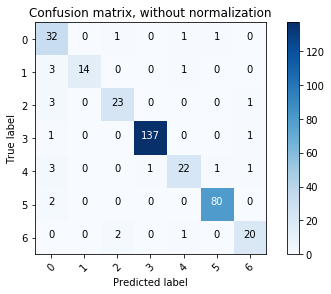

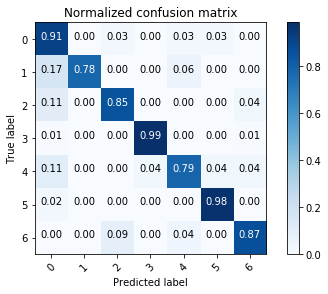

Wall time: 11.7 s


In [39]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_4_4
X_test = X_test_4_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaning/meta_net_train_4_4.npy"
file_path_test = "./Stacking_Results_France_ByMeaning/meta_net_test_4_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)